In [2]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf
from tensorflow import keras

# For accessing pre-trained models
import tensorflow_hub as hub

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib


c:\Users\srikr\Music\Rice Type Detection\tfenv\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [3]:
data_dir="Rice Type Detection\Data"

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Rice Type Detection/Data')

In [5]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

In [6]:
df_images = {
    'Arborio': arborio,
    'Basmati': basmati,
    'Jasmine': jasmine,
    'Ipsala': ipsala,
    'Karacadag': karacadag
}

In [7]:
df_labels = {
    'Arborio': 0,
    'Basmati': 1,
    'Jasmine': 2,
    'Ipsala': 3,
    'Karacadag': 4
}

In [8]:
X,y = [], []
for label, images in df_images.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image = cv2.resize(img, (224, 224))  # Resize to match model input size
        X.append(resized_image)
        y.append(df_labels[label])

In [9]:
X= np.array(X)
X=X/255.0
y= np.array(y)

In [54]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [10]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf
from tensorflow import keras

# For accessing pre-trained models
import tensorflow_hub as hub

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

# Load image data from folders
data_dir = "Rice Type Detection/Data"
data_dir = pathlib.Path(data_dir)

arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

df_images = {
    'Arborio': arborio,
    'Basmati': basmati,
    'Jasmine': jasmine,
    'Ipsala': ipsala,
    'Karacadag': karacadag
}

df_labels = {
    'Arborio': 0,
    'Basmati': 1,
    'Jasmine': 2,
    'Ipsala': 3,
    'Karacadag': 4
}

X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (224, 224))
        X.append(resized_image)
        y.append(df_labels[label])

X = np.array(X)
X = X / 255.0
y = np.array(y)


In [11]:
import cv2
import numpy as np

X, y = [], []

df_labels = {
    'Arborio': 0,
    'Basmati': 1,
    'Jasmine': 2,
    'Ipsala': 3,
    'Karacadag': 4
}

for label in df_labels:
    folder = data_dir / label
    images = list(folder.glob('*'))[:600]
    for image_path in images:
        img_data = cv2.imread(str(image_path))
        if img is not None:
            resized = cv2.resize(img_data, (224, 224))
            X.append(resized)
            y.append(df_labels[label])
        else:
            print(f"❌ Couldn't read: {image_path}")

X = np.array(X) / 255.0
y = np.array(y)

print("✅ Total images loaded:", len(X))


✅ Total images loaded: 0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, random_state=42, stratify=y_test_val
)
print("✅ Train/Test split complete")


✅ Train/Test split complete


In [14]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ 1. Set the correct dataset path
data_dir = Path(r"C:\Users\srikr\Music\Rice Type Detection\Rice Type Detection\Data\archive_12\Rice_Image_Dataset")
print("✅ Folder exists:", data_dir.exists())

# ✅ 2. Define image categories
df_labels = {
    'Arborio': 0,
    'Basmati': 1,
    'Jasmine': 2,
    'Ipsala': 3,
    'Karacadag': 4
}

# ✅ 3. Load images
X, y = [], []
valid_exts = ['*.jpg', '*.jpeg', '*.png']

for label in df_labels:
    folder = data_dir / label
    images = []
    
    # collect all matching image files
    for ext in valid_exts:
        images.extend(folder.glob(ext))
    images = images[:600]  # limit to 600 per class
    
    print(f"📂 {label} images found:", len(images))

    for image_path in images:
        img_data = cv2.imread(str(image_path))
        if img_data is not None:
            resized = cv2.resize(img_data, (224, 224))
            X.append(resized)
            y.append(df_labels[label])
        else:
            print(f"❌ Couldn't read: {image_path}")

# ✅ 4. Convert to numpy arrays & normalize
X = np.array(X) / 255.0
y = np.array(y)

print("✅ Total images loaded:", len(X))
print("✅ Total labels loaded:", len(y))


✅ Folder exists: True
📂 Arborio images found: 600
📂 Basmati images found: 600
📂 Jasmine images found: 600
📂 Ipsala images found: 600
📂 Karacadag images found: 600
✅ Total images loaded: 3000
✅ Total labels loaded: 3000


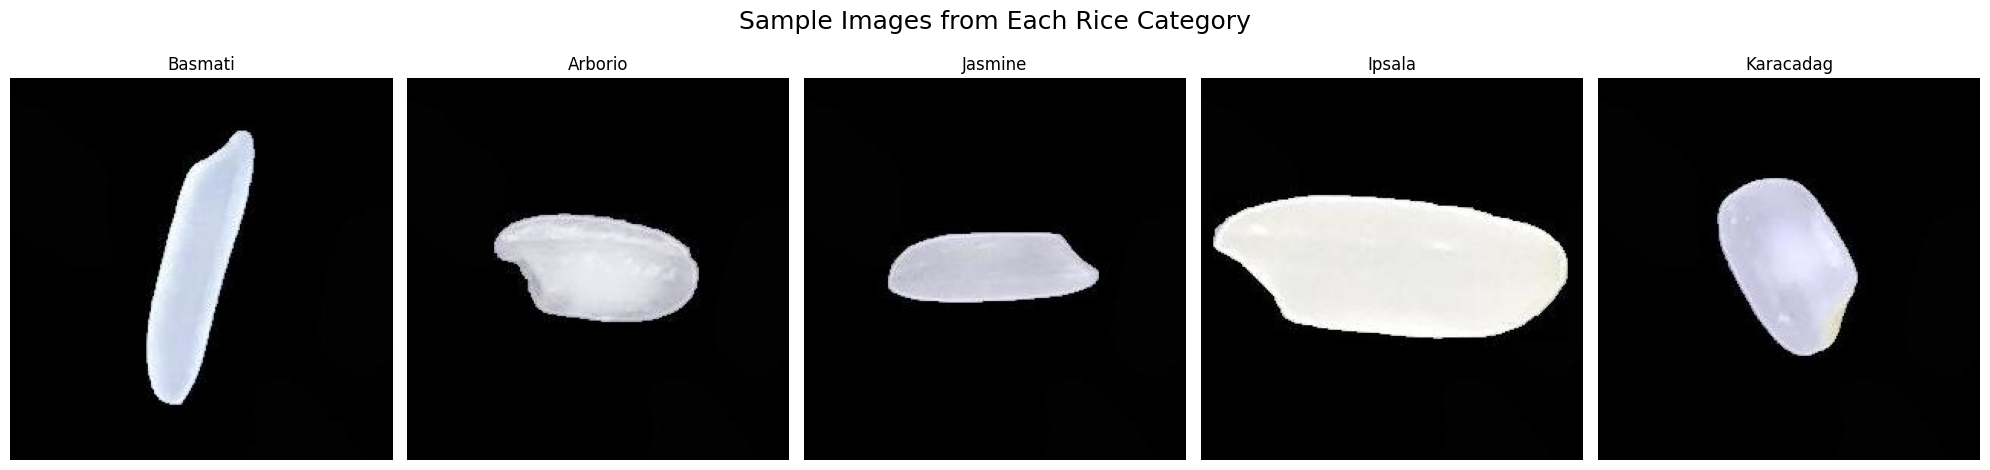

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define all rice types
categories = ['Basmati', 'Arborio', 'Jasmine', 'Ipsala', 'Karacadag']

# Load one sample image from each category
sample_images = []
for category in categories:
    image_path = list((data_dir / category).glob('*.jpg'))  # You can also include .png, .jpeg if needed
    if image_path:
        sample_images.append((category, image_path[0]))
    else:
        print(f"❌ No image found in {category}")

# Plot all 5 sample images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Sample Images from Each Rice Category", fontsize=18)

for i, (label, img_path) in enumerate(sample_images):
    image = mpimg.imread(str(img_path))
    ax[i].imshow(image)
    ax[i].set_title(label)
    ax[i].axis("off")

plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# ✅ Load MobileNetV2 base model without top classification layer
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # remove classifier
    weights='imagenet'  # use pretrained ImageNet weights
)

base_model.trainable = False  # freeze all layers

# ✅ Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),     # convert feature maps to single vector
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

# ✅ Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2422597 (9.24 MB)
Trainable params: 164

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10


71/71 [==============================] - 29s 331ms/step - loss: 0.3295 - accuracy: 0.8880 - val_loss: 0.1083 - val_accuracy: 0.9644
Epoch 2/10
71/71 [==============================] - 21s 295ms/step - loss: 0.0820 - accuracy: 0.9764 - val_loss: 0.0740 - val_accuracy: 0.9804
Epoch 3/10
71/71 [==============================] - 22s 306ms/step - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0969 - val_accuracy: 0.9733
Epoch 4/10
71/71 [==============================] - 85s 1s/step - loss: 0.0570 - accuracy: 0.9813 - val_loss: 0.0617 - val_accuracy: 0.9840
Epoch 5/10
71/71 [==============================] - 51s 707ms/step - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0718 - val_accuracy: 0.9822
Epoch 6/10
71/71 [==============================] - 20s 286ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0768 - val_accuracy: 0.9804
Epoch 7/10
71/71 [==============================] - 20s 284ms/step - loss: 0.0284 - accuracy: 0.9916 - val_loss: 0.0554 - val_accuracy: 0.9840


In [20]:
# ✅ Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


18/18 [==============================] - 4s 223ms/step - loss: 0.0563 - accuracy: 0.9858
✅ Test Accuracy: 98.58%


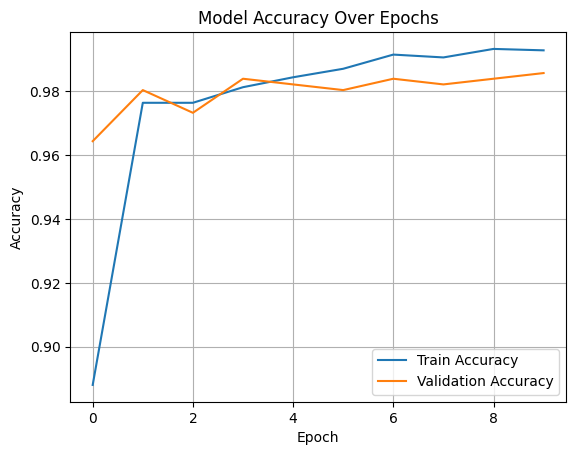

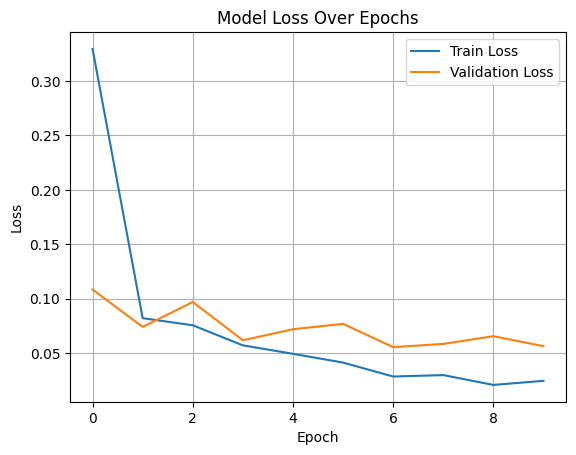

In [21]:
import matplotlib.pyplot as plt

# ✅ Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import cv2
import numpy as np

# ✅ Path to the test image (you can change this to any valid image)
test_image_path = data_dir / "Basmati" / "Basmati (10).jpg"  # adjust name if needed

# ✅ Read and preprocess the image
a1 = cv2.imread(str(test_image_path))
a1 = cv2.resize(a1, (224, 224))
a1 = np.array(a1) / 255.0
a1 = np.expand_dims(a1, axis=0)  # shape: (1, 224, 224, 3)

# ✅ Predict using the model
pred = model.predict(a1)
pred_class = np.argmax(pred)

# ✅ Map predicted label to rice type
for label, index in df_labels.items():
    if pred_class == index:
        print(f"✅ Predicted Class: {label}")


1/1 [==============================] - 1s 1s/step
✅ Predicted Class: Basmati


In [23]:
# ✅ Save model as HDF5 (.h5) format
model.save("rice.h5")
print("✅ Model saved as rice.h5")


c:\Users\srikr\Music\Rice Type Detection\tfenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model saved as rice.h5
